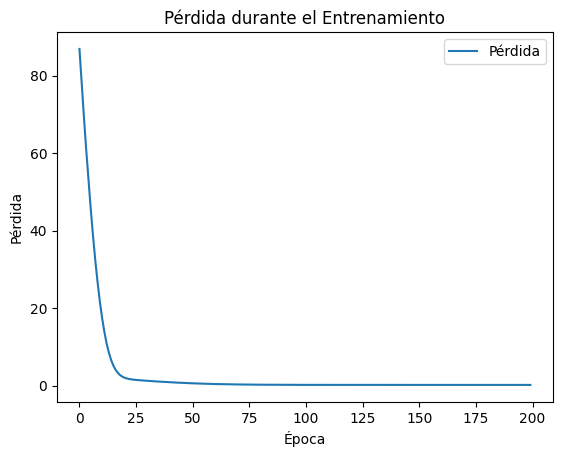

In [1]:
# Importamos las librerías necesarias
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Generación de datos para el Teorema de Pitágoras
# Creamos 500 valores aleatorios para los catetos 'a' y 'b'
a_values = np.random.uniform(1, 10, 500)
b_values = np.random.uniform(1, 10, 500)
c_values = np.sqrt(a_values**2 + b_values**2)  # Calculamos 'c' usando el Teorema de Pitágoras

# Creamos las matrices de datos de entrada (X) y salida (y) para el modelo
X = np.column_stack((a_values, b_values))  # 'a' y 'b' son las entradas
y = c_values  # 'c' es la salida deseada (la hipotenusa)

# 2. Definición del modelo de red neuronal
# Creamos una red neuronal simple con una capa oculta de 8 neuronas
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Capa de entrada con 2 neuronas (a y b)
    tf.keras.layers.Dense(units=8, activation='relu'),  # Capa oculta con 8 neuronas
    tf.keras.layers.Dense(units=1)  # Capa de salida con 1 neurona (resultado: c)
])

# 3. Compilación del modelo
# Elegimos el optimizador Adam y la función de pérdida de error cuadrático medio
model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Entrenamiento del modelo
# Entrenamos el modelo durante 200 épocas (ajustando los pesos para minimizar el error)
history = model.fit(X, y, epochs=200, verbose=0)

# 5. Guardado del modelo y del historial de entrenamiento
# Guardamos el modelo entrenado en un archivo para uso futuro
model.save('modelo_pitagoras_simplificado.keras')

# Guardamos el historial de entrenamiento en un archivo CSV para analizar el rendimiento
hist_df = pd.DataFrame(history.history)
hist_df.to_csv('historial_entrenamiento_simplificado.csv', index=False)

# 6. Visualización de la pérdida de entrenamiento
# Cargamos el historial guardado y graficamos la pérdida en función de las épocas
hist_df = pd.read_csv('historial_entrenamiento_simplificado.csv')
plt.plot(hist_df['loss'], label='Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()
plt.show()


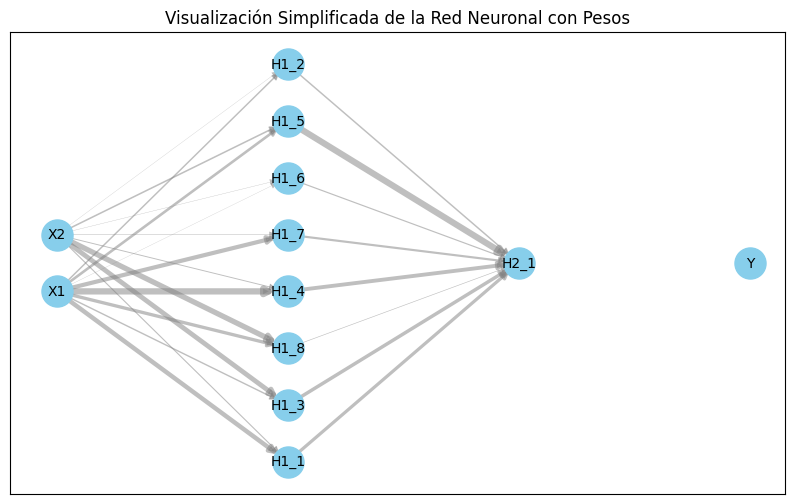

: 

In [2]:
# Importamos las librerías necesarias
import tensorflow as tf
import networkx as nx
import matplotlib.pyplot as plt

# 1. Cargar el modelo
# Cargamos el modelo previamente guardado en el archivo
model = tf.keras.models.load_model('modelo_pitagoras_simplificado.keras')

# 2. Obtener información de las capas del modelo
# Obtenemos la cantidad de neuronas en la entrada, las capas ocultas, y la salida
num_inputs = model.input_shape[-1]  # Número de entradas (2 para 'a' y 'b')
hidden_layers = [layer.units for layer in model.layers if isinstance(layer, tf.keras.layers.Dense)]
num_outputs = model.output_shape[-1]  # Número de neuronas en la capa de salida (1 para 'c')

# 3. Crear el grafo de la red neuronal
# Inicializamos un grafo dirigido para representar las conexiones
G = nx.DiGraph()

# 4. Añadir nodos al grafo
# Añadimos nodos para cada neurona en la capa de entrada
for i in range(num_inputs):
    G.add_node(f"X{i+1}", layer=0)  # Nombres de nodos: X1, X2

# Añadimos nodos para las neuronas de las capas ocultas
for layer_idx, num_neurons in enumerate(hidden_layers):
    for n in range(num_neurons):
        G.add_node(f"H{layer_idx+1}_{n+1}", layer=layer_idx+1)  # Nombres: H1_1, H1_2, etc.

# Añadimos el nodo de salida
G.add_node("Y", layer=len(hidden_layers) + 1)  # Nombre del nodo de salida: Y

# 5. Conectar nodos con los pesos de cada capa
# Extraemos los pesos de cada capa para crear las conexiones en el grafo
for layer_idx, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Dense):
        weights, _ = layer.get_weights()  # Obtenemos solo los pesos (sin bias)
        if layer_idx == 0:
            # Conectar capa de entrada con la primera capa oculta
            for i in range(num_inputs):
                for j in range(hidden_layers[0]):
                    G.add_edge(f"X{i+1}", f"H1_{j+1}", weight=weights[i, j])  # Agregar peso de la conexión
        elif layer_idx < len(hidden_layers):
            # Conectar capas ocultas entre sí
            for i in range(hidden_layers[layer_idx - 1]):
                for j in range(hidden_layers[layer_idx]):
                    G.add_edge(f"H{layer_idx}_{i+1}", f"H{layer_idx+1}_{j+1}", weight=weights[i, j])
        else:
            # Conectar última capa oculta con la capa de salida
            for i in range(hidden_layers[-1]):
                G.add_edge(f"H{len(hidden_layers)}_{i+1}", "Y", weight=weights[i, 0])

# 6. Dibujar la red neuronal con los pesos
# Utilizamos un layout específico para ordenar las capas visualmente
pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(10, 6))

# Dibujar nodos y etiquetas
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Dibujar conexiones, representando el peso con el grosor de la línea
edges = G.edges(data=True)
for u, v, d in edges:
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=5 * abs(d['weight']), alpha=0.5, edge_color='gray')

# Título de la visualización
plt.title("Visualización Simplificada de la Red Neuronal con Pesos")
plt.show()
